In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.style as style
import seaborn as sns

from statsmodels.stats.proportion import proportions_ztest
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split

import xgboost as xgb

%matplotlib inline

In [2]:
# Memory reduction for importing the dataset
df = data = pd.read_csv('data/criteo-uplift-v2.1.csv',
                   dtype={'f0': 'float32',
                          'f1': 'float32',
                          'f2': 'float32',
                          'f3': 'float32',
                          'f4': 'float32',
                          'f5':'float32',
                          'f6': 'float32',
                          'f7': 'float32',
                          'f8': 'float32',
                          'f9': 'float32',
                          'f10': 'float32',
                          'f11': 'float32',
                          'treatment': 'int8',
                          'conversion': 'int8',
                          'visit': 'int8',
                          'exposure':'int8'})

In [3]:
df.shape

(13979592, 16)

In [4]:
df.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure
0,12.616364,10.059654,8.976429,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
1,12.616364,10.059654,9.002689,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
2,12.616364,10.059654,8.964775,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
3,12.616364,10.059654,9.002801,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0
4,12.616364,10.059654,9.037999,4.679882,10.280525,4.115453,0.294443,4.833815,3.955396,13.190056,5.300375,-0.168679,1,0,0,0


In [5]:
data.isnull().sum()

f0            0
f1            0
f2            0
f3            0
f4            0
f5            0
f6            0
f7            0
f8            0
f9            0
f10           0
f11           0
treatment     0
conversion    0
visit         0
exposure      0
dtype: int64

<ipython-input-17-0c4d8205d866>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df.corr(), dtype=np.bool)


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5]),
 [Text(0, 0.5, 'f0'),
  Text(0, 1.5, 'f1'),
  Text(0, 2.5, 'f2'),
  Text(0, 3.5, 'f3'),
  Text(0, 4.5, 'f4'),
  Text(0, 5.5, 'f5'),
  Text(0, 6.5, 'f6'),
  Text(0, 7.5, 'f7'),
  Text(0, 8.5, 'f8'),
  Text(0, 9.5, 'f9'),
  Text(0, 10.5, 'f10'),
  Text(0, 11.5, 'f11'),
  Text(0, 12.5, 'treatment'),
  Text(0, 13.5, 'conversion'),
  Text(0, 14.5, 'visit'),
  Text(0, 15.5, 'exposure')])

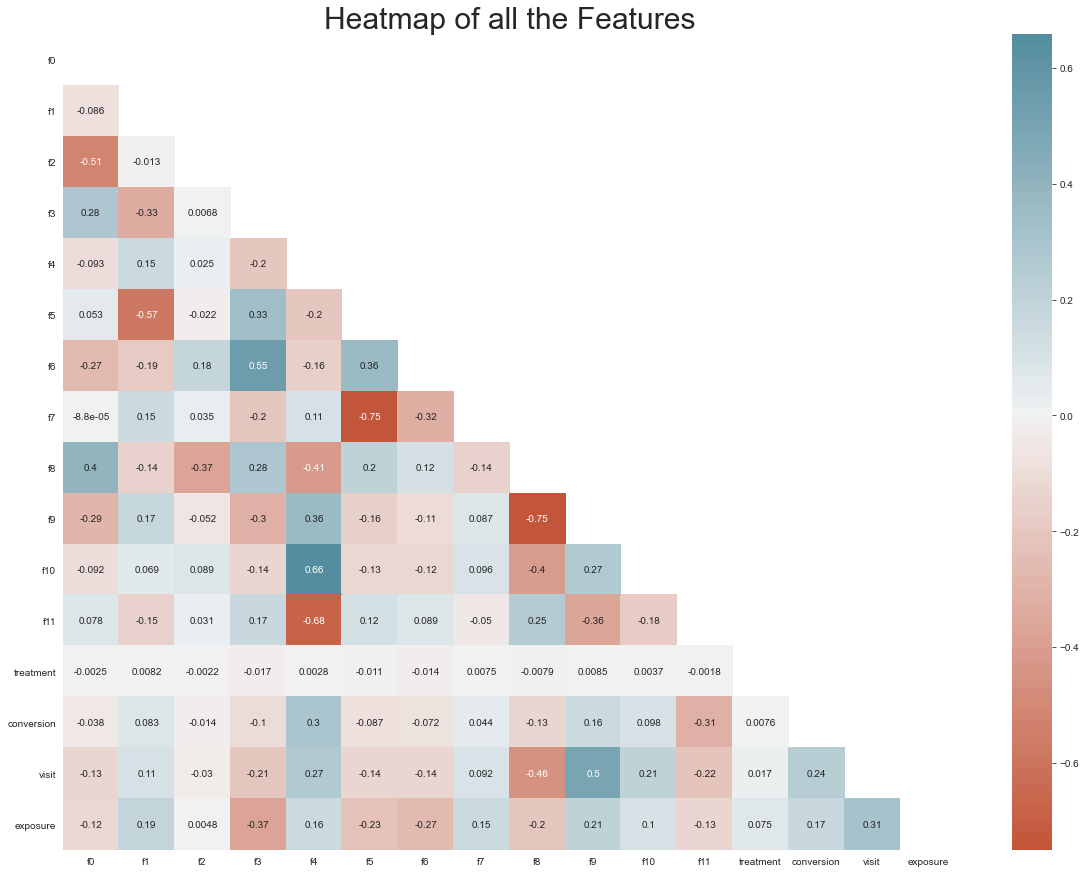

In [17]:
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (20,15))
## Plotting heatmap. 

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(df.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True, mask=mask, center = 0, );
plt.title("Heatmap of all the Features", fontsize = 30)
plt.yticks(rotation=0)